**Face Mask Detection**

In recent trend in world wide Lockdowns due to COVID19 outbreak, as Face Mask is became mandatory for everyone while roaming outside, approach of Deep Learning for Detecting Faces With and Without mask were a good trendy practice. Here I have created a model that detects face mask trained on 7553 images with 3 color channels (RGB).
On Custom CNN architecture Model training accuracy reached 94% and Validation accuracy 96%.

With transfer learning using MobieNetV2 architecture training accuracy achieved 98% and validation accuracy 99%.

Algorithm : Convolutional Neural Network

Framework : Tensorflow

Accelerator : GPU

Dataset : 7553 RGB Images (With Mask/Without Mask)

Dataset Credit:

I am going to use my own data set of Total 7553 images.

I have taken 1776 images including both With and Without Face Mask images from Prajna Bhandary's Github account

https://github.com/prajnasb/observations

Remaining 5777 images are collected and filtered from Google search engine.

3725 Images of Face with Mask

3828 Images of Face without Mask.

In [1]:

!pip install imutils

import tensorflow as tf
import tensorflow_hub as hub

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import add
from tensorflow.keras.layers import Activation
from keras.utils import plot_model
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Sequential , Model , load_model
from tensorflow.keras.models import load_model 

from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer

from tensorflow.keras.preprocessing.image import load_img , img_to_array
from tensorflow.keras.utils import to_categorical
from PIL import Image
import matplotlib.pyplot as plt

import cv2
from imutils import paths
import numpy as np
import os
import time
import warnings
warnings.filterwarnings("ignore")


  Created wheel for imutils: filename=imutils-0.5.3-py3-none-any.whl size=25850 sha256=0299a6765519fb52cb94f474d3774bd73a7a2835b25d6c392b36cca57a38dcf3
  Stored in directory: /root/.cache/pip/wheels/fc/9c/6d/1826267c72afa51b564c9c6e0f66abc806879338bc593a2270
Successfully built imutils
You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


I am going to use my own data set of Total 7553 images.

Data set credits:-> I have taken 1776 images including both With and Without Face Mask images from Prajna Bhandary's Github account

https://github.com/prajnasb/observations

Remaining 5777 images are collected and filtered from Google search engine.

3725 Images of Face with Mask
3828 Images of Face without Mask.

In [2]:
#Dataset folder path
data = "/kaggle/input/face-mask-dataset/data"


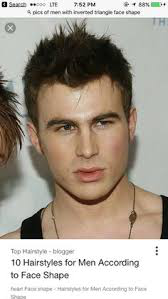

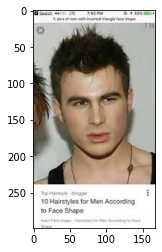

In [3]:
Img_Paths = list(paths.list_images(data))

#Displaying sample image from dataset
sample1 = Image.open(Img_Paths[1])
plt.imshow(sample1)
sample1


In [4]:
print(type(Img_Paths[1]))

<class 'str'>


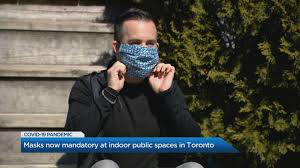

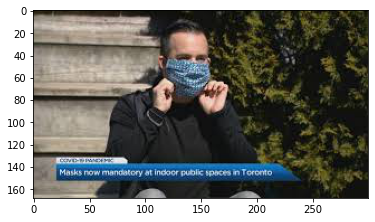

In [5]:
sample2 = Image.open(Img_Paths[-1])
plt.imshow(sample2)
sample2

In [6]:
#Initializing learning rate
INIT_LR = 0.0001
BATCH_SIZE = 32
EPOCHS = 20

#Getting all images and their labels in list
print("Loading images...")
Img_Paths = list(paths.list_images(data))
imgs = []
labels = []

#Looping over the image paths
for i in Img_Paths:
    #Extracting the class label
    label = i.split(os.path.sep)[-2]
    
    #Loading input image and processing it
    img = load_img(i,target_size=(224,224)) #Resizning all images with 224 Width and 224 height
    img = img_to_array(img) #Converting images to array
    img = preprocess_input(img)
    
    #updating imgs and labels respectively
    imgs.append(img)
    labels.append(label)
    
    
#Coverting imgs and labels to numpy array with float type
imgs = np.array(imgs,dtype="float32")
labels = np.array(labels)
print("...Done")


Loading images...
...Done


In [7]:
#Performing one-hot encoding on labels
lb = LabelBinarizer()
labels = lb.fit_transform(labels)
labels = to_categorical(labels)

#Splitting data into train and test

(X_train , X_test , y_train , y_test) = train_test_split(imgs,labels,test_size=0.20,stratify=labels,random_state=42)


#Constructing the generator for data augmentation

img_gen = ImageDataGenerator(rotation_range=40,
                            zoom_range=0.20,
                            width_shift_range=0.2,
                            height_shift_range=0.2,
                            shear_range=0.15,
                            horizontal_flip=True,
                            fill_mode="nearest")

print("Train size: ",len(X_train),"Test size: ",len(X_test))



Train size:  6042 Test size:  1511


Conducting experimental training I am first crating Custom CNN architecture.

Then using transfer learning method with MobileNetV2 acrchitecture.

In [8]:
model = Sequential()
model.add(Conv2D(512,(2,2),padding="same",activation="relu",input_shape=(224,224,3)))
model.add(MaxPooling2D((2,2),strides=2))

model.add(Conv2D(256,(2,2),padding="same",activation="relu"))
model.add(MaxPooling2D((2,2),strides=2))

model.add(Conv2D(128,(2,2),padding="same",activation="relu"))
model.add(MaxPooling2D((2,2),strides=2))

model.add(Conv2D(64,(2,2),padding="same",activation="relu"))
model.add(MaxPooling2D((2,2),strides=2))

model.add(Conv2D(32,(2,2),padding="same",activation="relu"))
model.add(MaxPooling2D((2,2),strides=2))

#model.add(BatchNormalization())

model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(64,activation="relu"))
model.add(Dense(2,activation="softmax"))

model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 512)     6656      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 512)     0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 256)     524544    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 256)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 128)       131200    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 64)        3

In [9]:
start = time.time()

history = model.fit(img_gen.flow(X_train,y_train,batch_size=5),
                    steps_per_epoch=300,
                    validation_data=(X_test,y_test),
                    validation_steps=300,
                    epochs=45)
end = time.time()
print("Total train time: ",(end-start)/60," mins")


Epoch 1/45
300/300 [==============================] - 34s 112ms/step - loss: 0.5765 - accuracy: 0.7114 - val_loss: 0.3603 - val_accuracy: 0.8610
Epoch 2/45
300/300 [==============================] - 31s 104ms/step - loss: 0.4929 - accuracy: 0.7720 - val_loss: 0.4347 - val_accuracy: 0.8220
Epoch 3/45
300/300 [==============================] - 32s 107ms/step - loss: 0.4448 - accuracy: 0.8060 - val_loss: 0.3892 - val_accuracy: 0.8213
Epoch 4/45
300/300 [==============================] - 32s 105ms/step - loss: 0.4375 - accuracy: 0.8060 - val_loss: 0.2854 - val_accuracy: 0.8882
Epoch 5/45
300/300 [==============================] - 32s 106ms/step - loss: 0.3731 - accuracy: 0.8353 - val_loss: 0.3588 - val_accuracy: 0.8577
Epoch 6/45
300/300 [==============================] - 31s 104ms/step - loss: 0.3966 - accuracy: 0.8370 - val_loss: 0.2823 - val_accuracy: 0.8815
Epoch 7/45
300/300 [==============================] - 32s 108ms/step - loss: 0.3570 - accuracy: 0.8473 - val_loss: 0.2418 - val_ac

Defining function to plot accuracy and loss of trained model which can be used for further use too.

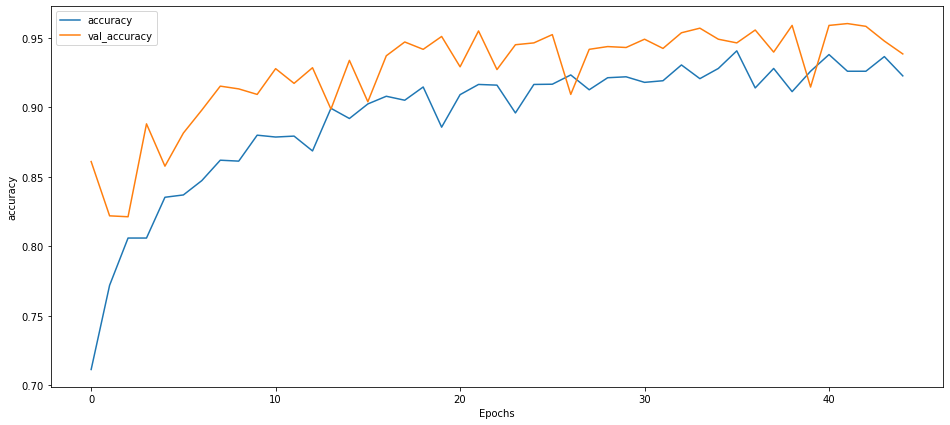

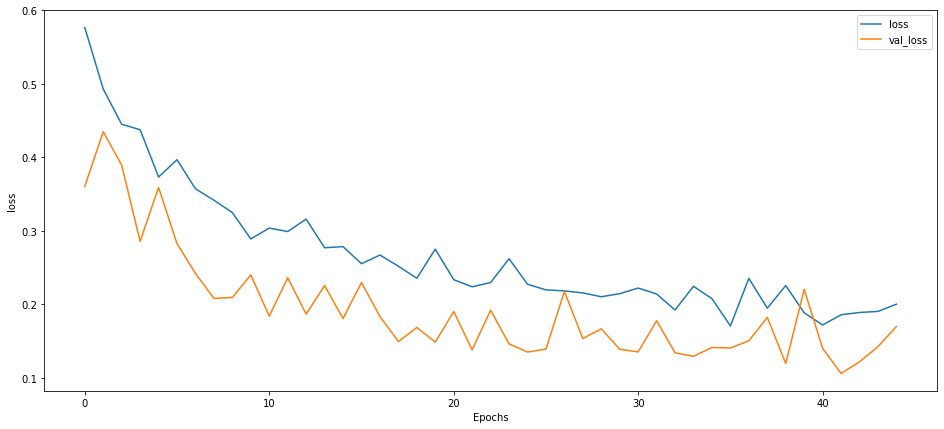

In [10]:

def plot_graph(history,string):
    plt.figure(figsize=(16,7))
    plt.plot(history.history[string],label=str(string))
    plt.plot(history.history["val_"+str(string)],label=str(string))
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string,"val_"+string])
    plt.show()


plot_graph(history,"accuracy")
plot_graph(history,"loss")

In [11]:
#Saving trained model
#model.save("Face_Mask_Net_Cunstom_CNN.h5")

[[0.0244488  0.97555125]]
NO MASK


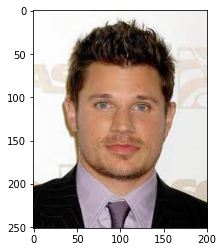

In [12]:
input_image = Img_Paths[0]
image1 = load_img(input_image,target_size=(224,224))
image2 = img_to_array(image1)
image2 = preprocess_input(image2)
image2 = np.array([image2],dtype="float32")
detection = model.predict(image2)
print(detection)
labels_dict={0:'MASK',1:'NO MASK'}
print(labels_dict[np.argmax(detection)])
input_image = Image.open(input_image)
plt.imshow(input_image)

Now trying with simple transfer learning method with state of the art MobileNetV2 architecture.

Find more details about MobileNetV2 

https://analyticsindiamag.com/why-googles-mobilenetv2-is-a-revolutionary-next-gen-on-device-computer-vision-network/

In [13]:
#Loading MobileNetV2 architecture
CLASSIFIER_URL ="https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/2"
IMAGE_RES = 224 #Image size in pixels as MobileNet is trained on same img size

model = Sequential()
model.add(hub.KerasLayer(CLASSIFIER_URL,input_shape=(IMAGE_RES,IMAGE_RES,3)))

model.add(Dense(2,activation="softmax"))

model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])
model.summary()



Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 1001)              3540265   
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 2004      
Total params: 3,542,269
Trainable params: 2,004
Non-trainable params: 3,540,265
_________________________________________________________________


In [14]:
start = time.time()

history = model.fit(img_gen.flow(X_train,y_train,batch_size=5),
                    steps_per_epoch=300,
                    validation_data=(X_test,y_test),
                    validation_steps=300,
                    epochs=45)
end = time.time()
print("Total train time: ",(end-start)/60," mins")


Epoch 1/45
300/300 [==============================] - 20s 67ms/step - loss: 0.2895 - accuracy: 0.8867 - val_loss: 0.1885 - val_accuracy: 0.9239
Epoch 2/45
300/300 [==============================] - 20s 67ms/step - loss: 0.1891 - accuracy: 0.9260 - val_loss: 0.1608 - val_accuracy: 0.9411
Epoch 3/45
300/300 [==============================] - 19s 63ms/step - loss: 0.1513 - accuracy: 0.9399 - val_loss: 0.1839 - val_accuracy: 0.9371
Epoch 4/45
300/300 [==============================] - 19s 63ms/step - loss: 0.1939 - accuracy: 0.9327 - val_loss: 0.1457 - val_accuracy: 0.9457
Epoch 5/45
300/300 [==============================] - 20s 67ms/step - loss: 0.1270 - accuracy: 0.9480 - val_loss: 0.1808 - val_accuracy: 0.9490
Epoch 6/45
300/300 [==============================] - 19s 63ms/step - loss: 0.1788 - accuracy: 0.9407 - val_loss: 0.1865 - val_accuracy: 0.9351
Epoch 7/45
300/300 [==============================] - 19s 63ms/step - loss: 0.1538 - accuracy: 0.9500 - val_loss: 0.1374 - val_accuracy:

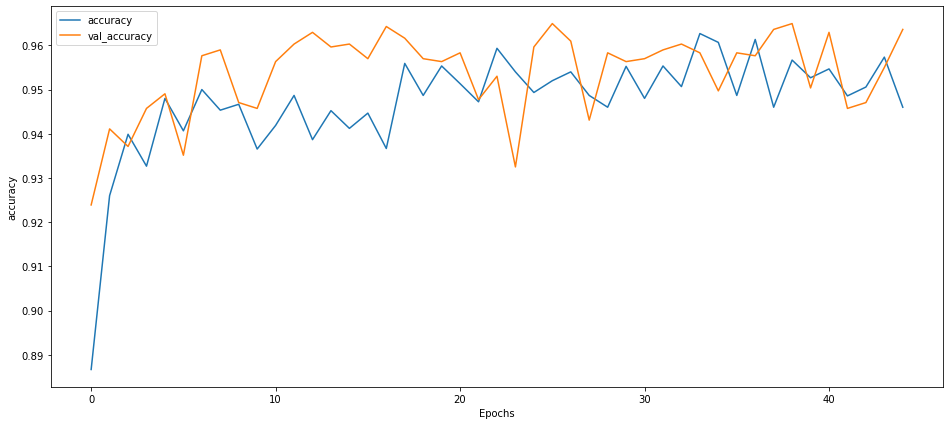

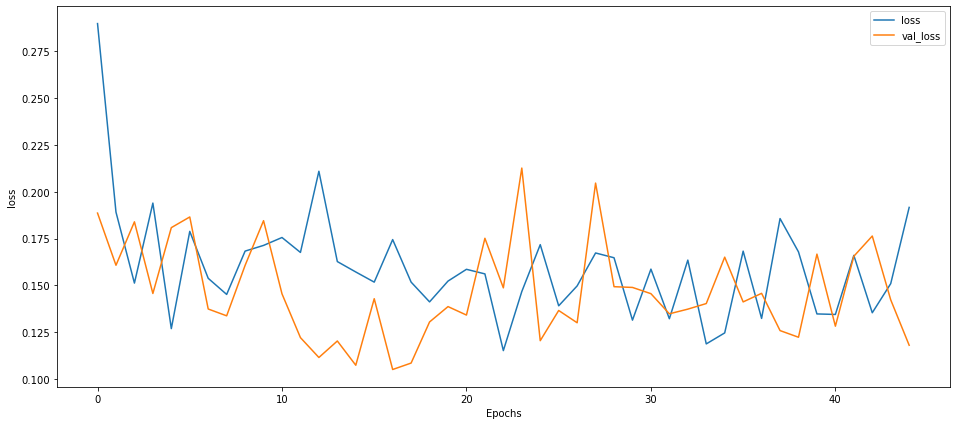

In [15]:
plot_graph(history,"accuracy")
plot_graph(history,"loss")


In [16]:
#model.save("Transfer_Learning_Model.h5")


[[2.9616328e-06 9.9999702e-01]]
NO MASK


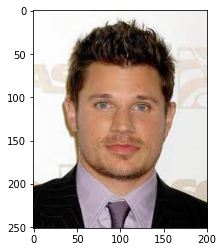

In [17]:
input_image = Img_Paths[0]
image1 = load_img(input_image,target_size=(224,224))
image2 = img_to_array(image1)
image2 = preprocess_input(image2)
image2 = np.array([image2],dtype="float32")
detection = model.predict(image2)
print(detection)
labels_dict={0:'MASK',1:'NO MASK'}
print(labels_dict[np.argmax(detection)])
input_image = Image.open(input_image)
plt.imshow(input_image)

This is another method for Transfer learning with same architecture.

Credits:-> Adrian Rosebrock

https://www.pyimagesearch.com/2020/05/04/covid-19-face-mask-detector-with-opencv-keras-tensorflow-and-deep-learning/

In [18]:
# load the MobileNetV2 network, ensuring the head FC layer sets are
# left off
from tensorflow.keras.applications import MobileNetV2
baseModel = MobileNetV2(weights="imagenet", include_top=False,
	input_tensor=Input(shape=(224, 224, 3)))
# construct the head of the model that will be placed on top of the
# the base model
headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(7, 7))(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(128, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(2, activation="softmax")(headModel)
# place the head FC model on top of the base model (this will become
# the actual model we will train)
model = Model(inputs=baseModel.input, outputs=headModel)
# loop over all layers in the base model and freeze them so they will
# *not* be updated during the first training process
for layer in baseModel.layers:
	layer.trainable = False
    
    

9412608/9406464 [==============================] - 0s 0us/step


In [19]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])
model.summary()


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
______________________________________________________________________________________________

In [20]:
start = time.time()

history = model.fit(img_gen.flow(X_train,y_train,batch_size=5),
                    steps_per_epoch=300,
                    validation_data=(X_test,y_test),
                    validation_steps=300,
                    epochs=45)
end = time.time()
print("Total train time: ",(end-start)/60," mins")


Epoch 1/45
300/300 [==============================] - 20s 65ms/step - loss: 0.2304 - accuracy: 0.9160 - val_loss: 0.0623 - val_accuracy: 0.9782
Epoch 2/45
300/300 [==============================] - 19s 63ms/step - loss: 0.1211 - accuracy: 0.9560 - val_loss: 0.0528 - val_accuracy: 0.9795
Epoch 3/45
300/300 [==============================] - 20s 66ms/step - loss: 0.1104 - accuracy: 0.9627 - val_loss: 0.1661 - val_accuracy: 0.9404
Epoch 4/45
300/300 [==============================] - 19s 63ms/step - loss: 0.1193 - accuracy: 0.9540 - val_loss: 0.0353 - val_accuracy: 0.9868
Epoch 5/45
300/300 [==============================] - 18s 61ms/step - loss: 0.0652 - accuracy: 0.9773 - val_loss: 0.0354 - val_accuracy: 0.9841
Epoch 6/45
300/300 [==============================] - 20s 65ms/step - loss: 0.0662 - accuracy: 0.9753 - val_loss: 0.0485 - val_accuracy: 0.9828
Epoch 7/45
300/300 [==============================] - 19s 64ms/step - loss: 0.0880 - accuracy: 0.9660 - val_loss: 0.0413 - val_accuracy:

In [21]:
#model.save("Transfer Learned.h5")

[[3.5662158e-08 1.0000000e+00]]
NO MASK


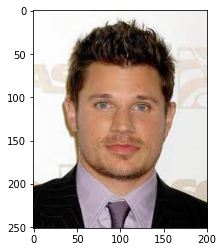

In [22]:
input_image = Img_Paths[0]
image1 = load_img(input_image,target_size=(224,224))
image2 = img_to_array(image1)
image2 = preprocess_input(image2)
image2 = np.array([image2],dtype="float32")
detection = model.predict(image2)
print(detection)
labels_dict={0:'MASK',1:'NO MASK'}
print(labels_dict[np.argmax(detection)])
input_image = Image.open(input_image)
plt.imshow(input_image)

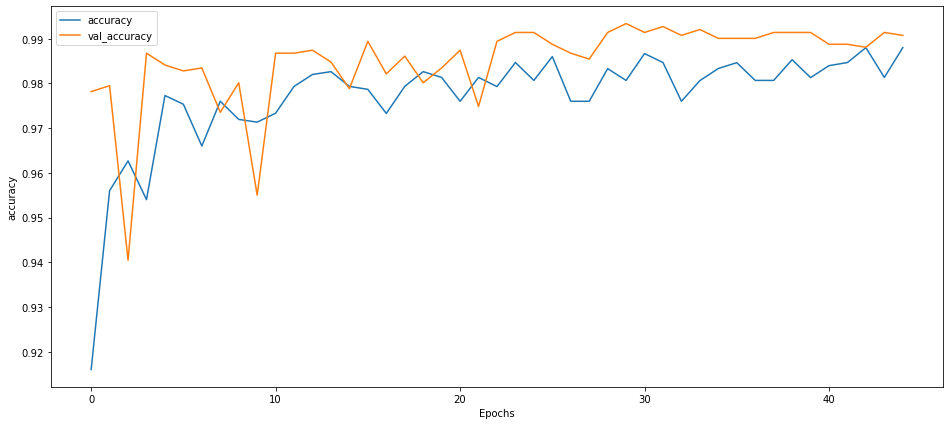

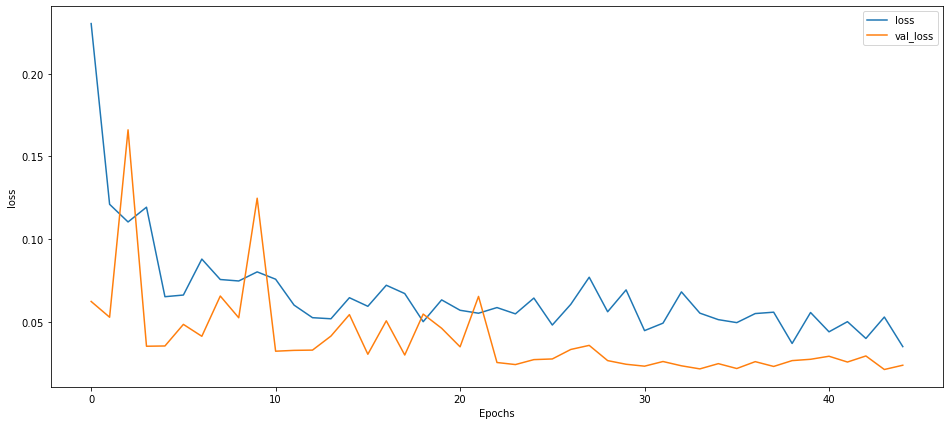

In [23]:
plot_graph(history,"accuracy")
plot_graph(history,"loss")


Below code is to load trained model and make predictions on single image or input from live webcam.

In [ ]:

maskNet = load_model("Face_Mask_Net_Cunstom_CNN.h5")
face_clsfr=cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
labels_dict={0:'MASK',1:'NO MASK'}
color_dict={0:(0,255,0),1:(0,0,255)}


def Detector(image_file):
    
    input_image = image_file
    input_image1 = cv2.imread(input_image)
    
    faces=face_clsfr.detectMultiScale(input_image1,1.1,1)  
    
    for (x,y,w,h) in faces:
    
        face_img=input_image1[y:y+w,x:x+w]
        #resized=cv2.resize(face_img,(224,224))
        #image1 = load_img(face_img,target_size=(224,224))
        image1 = cv2.resize(face_img,(224,224))
        image2 = img_to_array(image1)
        image3 = preprocess_input(image2)
        
        image4 = np.array([image3],dtype="float32")
        result=maskNet.predict(image4)

        label=np.argmax(result,axis=1)[0]
      
        cv2.rectangle(input_image1,(x,y),(x+w,y+h),color_dict[label],1)
        cv2.rectangle(input_image1,(x,y-40),(x+w,y),color_dict[label],-1)
        cv2.putText(input_image1, labels_dict[label], (x, y-10),cv2.FONT_HERSHEY_SIMPLEX,0.5,(255,255,255),1)
    cv2.imshow("Detection",input_image1)
    cv2.waitKey(0)
    cv2.destroyAllWindows()


In [ ]:
Detector(str(image_file_path))

To run with webcam use below code.

In [ ]:


maskNet = load_model("Face_Mask_Net_Cunstom_CNN.h5")
face_clsfr=cv2.CascadeClassifier('haarcascade_frontalface_default.xml')


source=cv2.VideoCapture(0)
labels_dict={0:'MASK',1:'NO MASK'}
color_dict={0:(0,255,0),1:(0,0,255)}


while(True):

    ret,img=source.read()
    
    faces=face_clsfr.detectMultiScale(img,1.2,2)  
    
    

    for (x,y,w,h) in faces:
    
        face_img=img[y:y+w,x:x+w]
        #resized=cv2.resize(face_img,(224,224))
        #image1 = load_img(face_img,target_size=(224,224))
        image1 = cv2.resize(face_img,(224,224))
        image2 = img_to_array(image1)
        image3 = preprocess_input(image2)
        
        image4 = np.array([image3],dtype="float32")
        result=maskNet.predict(image4)

        label=np.argmax(result,axis=1)[0]
      
        cv2.rectangle(img,(x,y),(x+w,y+h),color_dict[label],2)
        cv2.rectangle(img,(x,y-40),(x+w,y),color_dict[label],-1)
        cv2.putText(img, labels_dict[label], (x, y-10),cv2.FONT_HERSHEY_SIMPLEX,0.8,(255,255,255),2)
        
        
    cv2.imshow('Face Mask Detector',img)
    key=cv2.waitKey(1)
    
    # if(key==27):
    #     break
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
        
cv2.destroyAllWindows()
source.release()
